In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [47]:
# load dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")
columns= ['buying','maint','doors','persons','lug_boot','safety','classes']

# Assign names to Columns
df.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']
df.head()


,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [48]:
#to see dimensions of data frame
df.shape

(1727, 7)

In [49]:
#creating labelEncoder and seprating dataset in to X and Y
le = preprocessing.LabelEncoder()
data=df.values
X=data[:,0:6]
Y=data[:,6]
for i in range(6):
  X[:,i]=le.fit_transform(X[:,i])
Y=le.fit_transform(Y)
print(X)
print(Y)

[[3 3 0 0 2 2]
 [3 3 0 0 2 0]
 [3 3 0 0 1 1]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]
[2 2 2 ... 2 1 3]


In [50]:
# Split Data to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [69]:
# create model when weight=uniform value
k=[1,3,5,7,9,11]
j=0
test_accuracy = np.empty(len(k))
#checking accuracy for different values of K
for i in k:
  knn = KNeighborsClassifier(n_neighbors=i, weights='uniform', metric='minkowski')

  knn.fit(X_train, y_train)

  predictions = knn.predict(X_test)

  test_accuracy[j] = accuracy_score(y_test, predictions)
  print('k=',i, 'Accuracy=', test_accuracy[j])
  j=j+1

k= 1 Accuracy= 0.7716763005780347
k= 3 Accuracy= 0.8526011560693642
k= 5 Accuracy= 0.8930635838150289
k= 7 Accuracy= 0.9421965317919075
k= 9 Accuracy= 0.9248554913294798
k= 11 Accuracy= 0.8988439306358381


No handles with labels found to put in legend.


weights=uniform


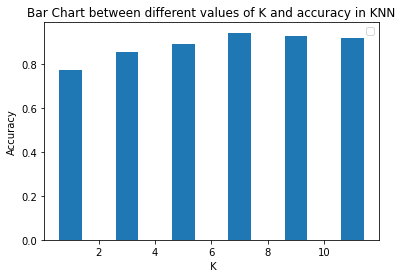

In [73]:
#bar plot between K values and Accuracy when weight=uniform
plt.bar(k, test_accuracy)
print('weights=uniform')
plt.xlabel(" K")
plt.ylabel("Accuracy")
plt.title("Bar Chart between different values of K and accuracy in KNN")
plt.legend()
plt.show()

In [70]:
# create model when weight=diatance value
k=[1,3,5,7,9,11]
j=0
test_accuracy = np.empty(len(k))
#checking accuracy for different values of K
for i in k:
  knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski')

  knn.fit(X_train, y_train)

  predictions = knn.predict(X_test)

  test_accuracy[j] = accuracy_score(y_test, predictions)
  print('k=',i, 'Accuracy=', test_accuracy[j])
  j=j+1

k= 1 Accuracy= 0.7716763005780347
k= 3 Accuracy= 0.8526011560693642
k= 5 Accuracy= 0.8930635838150289
k= 7 Accuracy= 0.9421965317919075
k= 9 Accuracy= 0.9277456647398844
k= 11 Accuracy= 0.9161849710982659


No handles with labels found to put in legend.


weights=distance


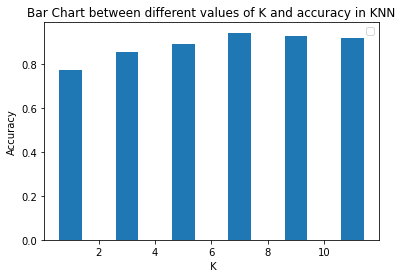

In [64]:
#bar plot between K values and Accuracy when weight=distance
plt.bar(k, test_accuracy)
print('weights=distance')
plt.xlabel(" K")
plt.ylabel("Accuracy")
plt.title("Bar Chart between different values of K and accuracy in KNN")
plt.legend()
plt.show()